In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# Import data sets
train = pd.read_csv("train.csv.gz", compression = "gzip")
# test = pd.read_csv("test.csv.gz", compression = "gzip")
# submission = pd.read_csv("sample_submission.csv.gz", compression = "gzip")

In [3]:
train.head(5)

AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  2014-02-12 18:22:00  Return_to_owner            NaN   
1  A656520    Emily  2013-10-13 12:44:00       Euthanasia      Suffering   
2  A686464   Pearce  2015-01-31 12:28:00         Adoption         Foster   
3  A683430      NaN  2014-07-11 19:09:00         Transfer        Partner   
4  A667013      NaN  2013-11-15 12:52:00         Transfer        Partner   

  AnimalType SexuponOutcome AgeuponOutcome                        Breed  \
0        Dog  Neutered Male         1 year        Shetland Sheepdog Mix   
1        Cat  Spayed Female         1 year       Domestic Shorthair Mix   
2        Dog  Neutered Male        2 years                 Pit Bull Mix   
3        Cat    Intact Male        3 weeks       Domestic Shorthair Mix   
4        Dog  Neutered Male        2 years  Lhasa Apso/Miniature Poodle   

         Color  
0  Brown/White  
1  Cream Tabby  
2   Blue/White  
3   Blue Cream  
4          Tan

In [4]:
print(train.dtypes)

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object


In [5]:
print(train.shape)

(26729, 10)


In [6]:
# Extract year, month, day, hour from datetime
train['year'] = pd.DatetimeIndex(train.DateTime).year
train['month'] = pd.DatetimeIndex(train.DateTime).month
train['day'] = pd.DatetimeIndex(train.DateTime).day
train['hour'] = pd.DatetimeIndex(train.DateTime).hour
train['dayofweek'] = pd.DatetimeIndex(train.DateTime).dayofweek
train['date'] = pd.DatetimeIndex(train.DateTime).date
train['monthyear'] = pd.DatetimeIndex(train.DateTime).strftime('%Y-%m')
train['IsWeekend'] = (pd.DatetimeIndex(train.DateTime).dayofweek) // 5 == 1

In [7]:
# See all SexuponOutcome options
train.SexuponOutcome = train.SexuponOutcome.astype(str)
train.SexuponOutcome.value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
nan                 1
Name: SexuponOutcome, dtype: int64

In [8]:
# Split Sexupon Outcome to Sex and Alter Type
def is_altered(SexuponOutcome):
    if "unknown" in SexuponOutcome.lower():
        return "Unknown"
    elif "intact" in SexuponOutcome.lower():
        return "Intact"
    else:
        return "Altered"

In [9]:
def gender(SexuponOutcome):
    if "unknown" in SexuponOutcome.lower():
        return "Unknown"
    elif "female" in SexuponOutcome.lower():
        return "Female"
    else:
        return "Male"

In [10]:
train['Is_Altered'] = train.SexuponOutcome.apply(is_altered)
train['Gender'] = train.SexuponOutcome.apply(gender)

In [11]:
# Identify mixed breed vs full breed
def breed_type(breed):
#     if "/" in breed or "mix" in breed.lower():
    if "mix" in breed.lower():
        return "Mixed Breed"
    else:
        return "Full Breed"

In [12]:
train['Breed_Type'] = train.Breed.apply(breed_type)

In [13]:
# Check if pet has a name
def has_name(name):
    if pd.isnull(name):
        return False
    else:
        return True

In [14]:
train['Has_Name'] = train.Name.apply(has_name)

In [15]:
# Extract pet age from string and adjust age if less than 1 years old
def clean_age(x):
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

In [16]:
train.AgeuponOutcome = train.AgeuponOutcome.astype(str)
train['Age'] = train.AgeuponOutcome.apply(clean_age)

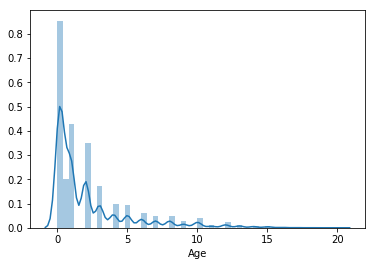

In [18]:
# Distribution of ages
sns.distplot(train.Age)

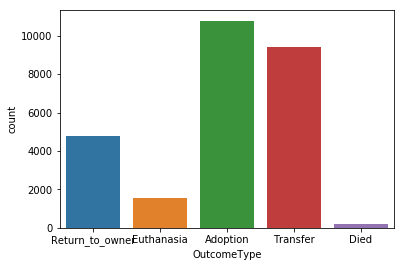

In [19]:
# Distribution of outcome type
sns.countplot(x = train.OutcomeType)

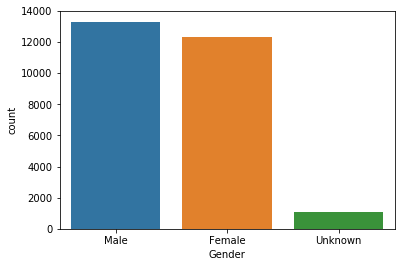

In [20]:
# number of pets by sex
sns.countplot(x="Gender", data = train)

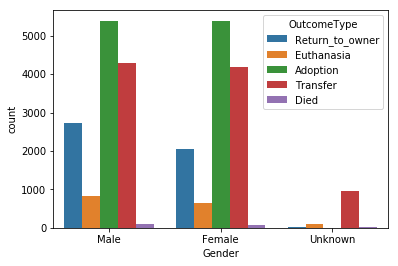

In [21]:
# what are the outcomes by sex
sns.countplot(x="Gender", hue = "OutcomeType", data = train)

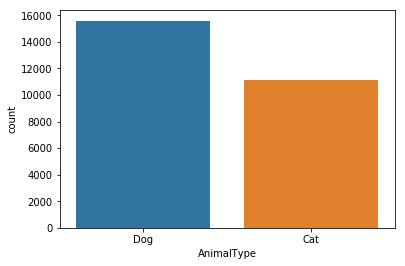

In [22]:
sns.countplot(x="AnimalType", data = train)

In [23]:
# Total outcomes by animal type
train.AnimalType.value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

[Text(0,0.5,'Total Outcomes by Type'),
 Text(0.5,0,'Type of Animal'),
 Text(0.5,1,'Outcome by Animal')]

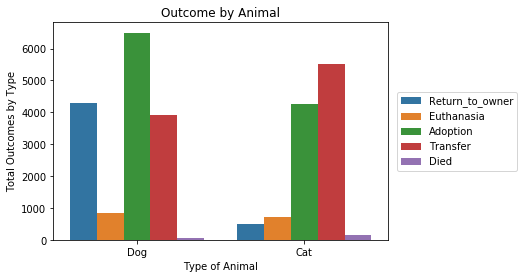

In [24]:
# number of animals by species
ax = sns.countplot(x="AnimalType", hue = "OutcomeType", data = train)
ax.legend(loc = 5, bbox_to_anchor=(1.4, 0.5))
ax.set(xlabel = "Type of Animal",
       ylabel = "Total Outcomes by Type",
       title = "Outcome by Animal")

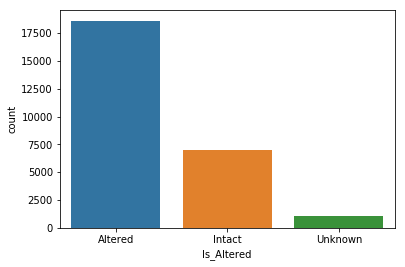

In [25]:
sns.countplot(x="Is_Altered", data = train)

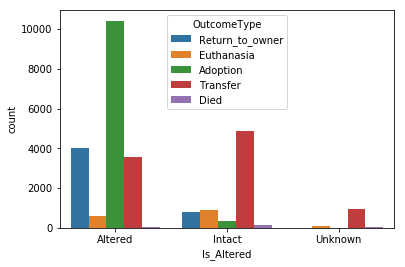

In [26]:
sns.countplot(x="Is_Altered", hue = "OutcomeType", data = train)

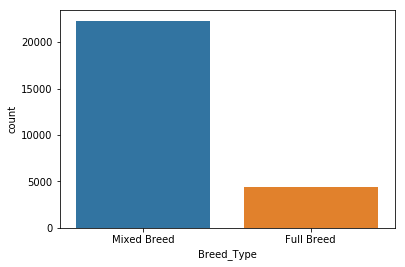

In [27]:
sns.countplot(x="Breed_Type", data = train)

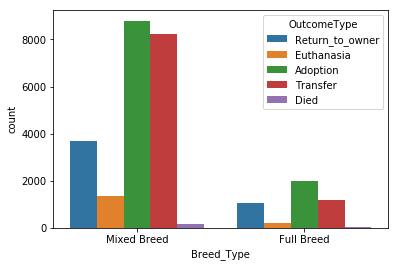

In [28]:
sns.countplot(x="Breed_Type", hue = "OutcomeType",data = train)

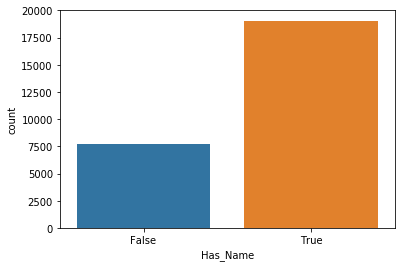

In [29]:
sns.countplot(x="Has_Name", data = train)

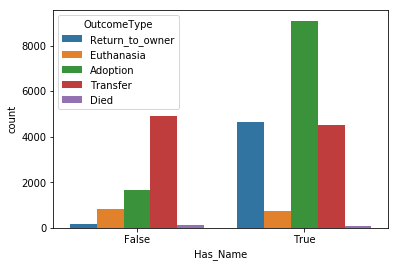

In [30]:
sns.countplot(x="Has_Name", hue = "OutcomeType", data = train)

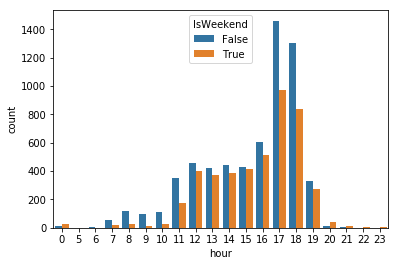

In [31]:
sns.countplot(x="hour", hue = 'IsWeekend', data = train[train.OutcomeType == 'Adoption'])

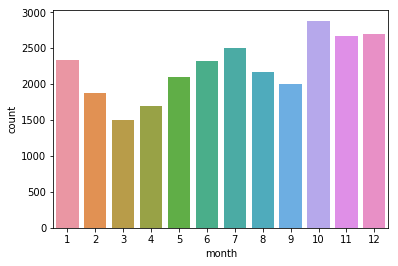

In [32]:
sns.countplot(x="month", data = train) # 2013 only has 3 months of data

In [33]:
# Create subset to show adoptions by animal type and month
adoptionTrain = train[(train.OutcomeType == "Adoption")
                        & (train.year != 2013)
                       ].groupby(by = ["AnimalType", "month"], as_index = False).count()

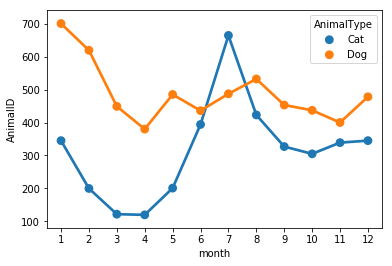

In [34]:
sns.pointplot(x = "month", y = "AnimalID", data = adoptionTrain, hue = "AnimalType")

In [35]:
# Create subset to show adoptions by animal type and mont
transferTrain = train[(train.OutcomeType == "Transfer")
                        & (train.year != 2013)
                       ].groupby(by = ["AnimalType", "month"], as_index = False).count()

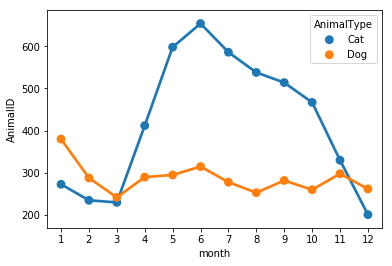

In [36]:
sns.pointplot(x = "month", y = "AnimalID", data = transferTrain, hue = "AnimalType")

In [37]:
group_train_date = train[train.OutcomeType == "Adoption"].groupby(by = ["date","IsWeekend"], as_index = False).count()

In [43]:
medians = group_train_date.groupby(by = 'IsWeekend', as_index = False).median()

In [44]:
print(medians)

   IsWeekend  AnimalID  Name  DateTime  OutcomeType  OutcomeSubtype  \
0      False       9.0   8.0       9.0          9.0             1.0   
1       True      17.0  14.5      17.0         17.0             2.0   

   AnimalType  SexuponOutcome  AgeuponOutcome  Breed  ...   month   day  hour  \
0         9.0             9.0             9.0    9.0  ...     9.0   9.0   9.0   
1        17.0            17.0            17.0   17.0  ...    17.0  17.0  17.0   

   dayofweek  monthyear  Is_Altered  Gender  Breed_Type  Has_Name   Age  
0        9.0        9.0         9.0     9.0         9.0       9.0   9.0  
1       17.0       17.0        17.0    17.0        17.0      17.0  17.0  

[2 rows x 22 columns]


Text(0.5,0.98,'Adoptions by Day of the Week')

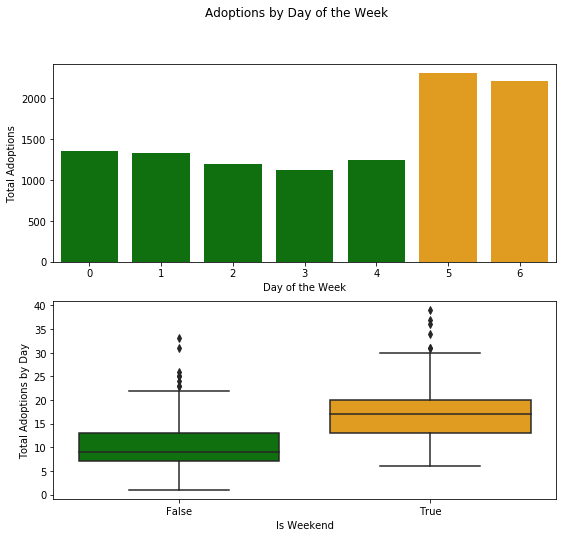

In [39]:
# Most adoptions happen on Sat-Sun
fig, axes = plt.pyplot.subplots(nrows=2, sharey=False, figsize=(9,8))
sns.countplot(x="dayofweek", data = train[train.OutcomeType == 'Adoption'],
             ax=axes[0],  palette=["Green","Green","Green","Green","Green","Orange", "Orange"])
sns.boxplot(x = "IsWeekend", y = "AnimalID", data = group_train_date[group_train_date.AnimalID < 40],
           ax=axes[1], palette=['Green','Orange'])
axes[0].set(xlabel="Day of the Week", ylabel="Total Adoptions")
axes[1].set(xlabel="Is Weekend", ylabel="Total Adoptions by Day")
fig.suptitle("Adoptions by Day of the Week")

Text(0.5,0.98,'Outcomes for Pets with and without Names')

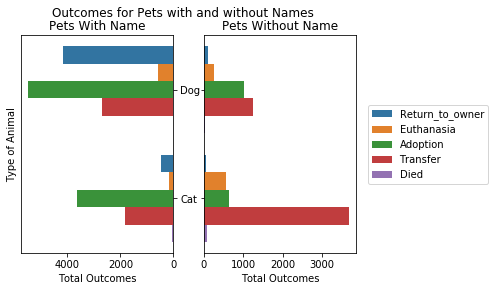

In [92]:
fig, axes = plt.pyplot.subplots(ncols=2, sharey=True)

sns.countplot(y="AnimalType", hue = "OutcomeType",
              order=['Dog','Cat'],
              hue_order = ['Return_to_owner','Euthanasia','Adoption','Transfer','Died'],
              ax=axes[0],
              data = train[train.Has_Name == True])
sns.countplot(y="AnimalType", hue = "OutcomeType",
              order=['Dog','Cat'],
              hue_order = ['Return_to_owner','Euthanasia','Adoption','Transfer','Died'],
              data = train[train.Has_Name == False])
axes[0].invert_xaxis()
axes[0].yaxis.tick_right()
axes[0].set_title("Pets With Name")
axes[1].set_title("Pets Without Name")
axes[0].set(xlabel="Total Outcomes", ylabel="Type of Animal")
axes[1].set(xlabel="Total Outcomes", ylabel="")
axes[0].legend_.remove()
axes[1].legend(loc = 5, bbox_to_anchor=(1.9, 0.5))
fig.suptitle("Outcomes for Pets with and without Names")

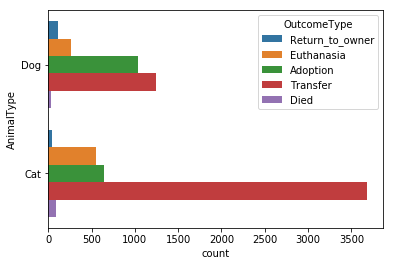

In [70]:
sns.countplot(y="AnimalType", hue = "OutcomeType",
              order=['Dog','Cat'],
              hue_order = ['Return_to_owner','Euthanasia','Adoption','Transfer','Died'],
              data = train[train.Has_Name == False])

In [52]:
group_train_my = train[train.OutcomeType == "Adoption"].groupby(by = ["AnimalType","monthyear"], as_index = False).count()

In [53]:
group_train_my_transfer = train[train.OutcomeType == "Transfer"].groupby(by = ["AnimalType","monthyear"], as_index = False).count()

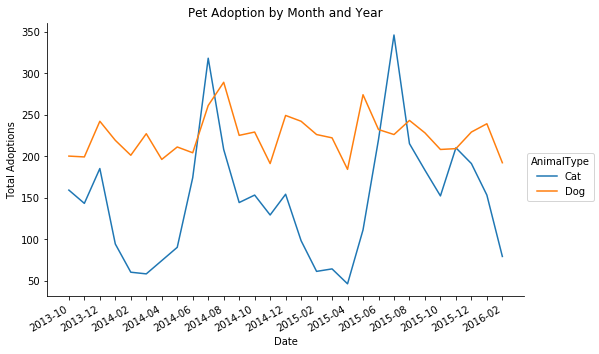

In [232]:
g = sns.FacetGrid(group_train_my, hue='AnimalType', size=5, aspect=1.5)
g.map(plt.pyplot.plot, 'monthyear', 'OutcomeType').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Total Adoptions',
         title='Pet Adoption by Month and Year')
for label in g.ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
g.fig.autofmt_xdate()

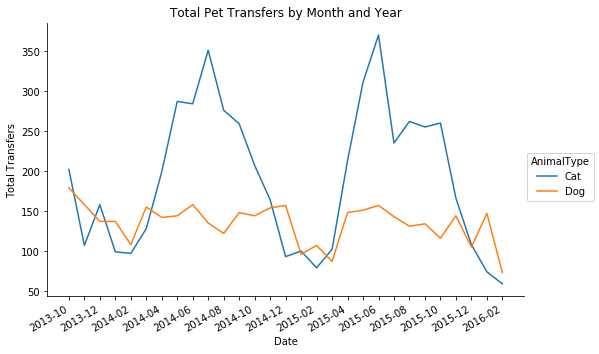

In [227]:
g = sns.FacetGrid(group_train_my_transfer, hue='AnimalType', size=5, aspect=1.5, palette = ['Red','Blue'])
g.map(plt.pyplot.plot, 'monthyear', 'OutcomeType').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Total Transfers',
         title='Total Pet Transfers by Month and Year')
for label in g.ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
g.fig.autofmt_xdate()

In [65]:
# Group adoptions by hour
adoptions_time = train[train.OutcomeType == 'Adoption'].groupby(by='hour', as_index = False).count()

In [66]:
adoptions_time

hour  AnimalID  Name  DateTime  OutcomeType  OutcomeSubtype  AnimalType  \
0      0        37    30        37           37               3          37   
1      5         1     1         1            1               1           1   
2      6         7     3         7            7               6           7   
3      7        79    69        79           79              69          79   
4      8       143   120       143          143             134         143   
5      9       114    95       114          114             102         114   
6     10       136   117       136          136             102         136   
7     11       530   457       530          530             181         530   
8     12       863   767       863          863             183         863   
9     13       798   714       798          798             157         798   
10    14       832   741       832          832             145         832   
11    15       843   785       843          843             148         843   
12    16      1121   983      1121         1121             130        1121   
13    17      2438  1911      2438         2438             274        2438   
14    18      2139  1741      2139         2139             194        2139   
15    19       609   500       609          609              82         609   
16    20        56    39        56           56              44          56   
17    21        15    10        15           15               6          15   
18    22         4     4         4            4               4           4   
19    23         4     4         4            4               1           4   

    SexuponOutcome  AgeuponOutcome  Breed  ...    day  dayofweek  date  \
0               37              37     37  ...     37         37    37   
1                1               1      1  ...      1          1     1   
2                7               7      7  ...      7          7     7   
3               79              79     79  ...     79         79    79   
4              143             143    143  ...    143        143   143   
5              114             114    114  ...    114        114   114   
6              136             136    136  ...    136        136   136   
7              530             530    530  ...    530        530   530   
8              863             863    863  ...    863        863   863   
9              798             798    798  ...    798        798   798   
10             832             832    832  ...    832        832   832   
11             843             843    843  ...    843        843   843   
12            1121            1121   1121  ...   1121       1121  1121   
13            2438            2438   2438  ...   2438       2438  2438   
14            2139            2139   2139  ...   2139       2139  2139   
15             609             609    609  ...    609        609   609   
16              56              56     56  ...     56         56    56   
17              15              15     15  ...     15         15    15   
18               4               4      4  ...      4          4     4   
19               4               4      4  ...      4          4     4   

    monthyear  IsWeekend  Is_Altered  Gender  Breed_Type  Has_Name   Age  
0          37         37          37      37          37        37    37  
1           1          1           1       1           1         1     1  
2           7          7           7       7           7         7     7  
3          79         79          79      79          79        79    79  
4         143        143         143     143         143       143   143  
5         114        114         114     114         114       114   114  
6         136        136         136     136         136       136   136  
7         530        530         530     530         530       530   530  
8         863        863         863     863         863       863   863  
9         798        798         798   

[Text(0,0.5,'Total Adoptions'),
 Text(0.5,0,'Hour in Day'),
 Text(0.5,1,'Total Adoptions by Hour')]

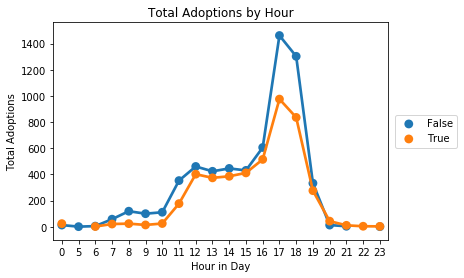

In [64]:
ax = sns.pointplot(x = 'hour', y = 'AnimalID',data = adoptions_time, hue = 'IsWeekend')
ax.legend(loc = 5, bbox_to_anchor=(1.22, 0.5))
ax.set(xlabel = "Hour in Day",
       ylabel = "Total Adoptions",
       title = "Total Adoptions by Hour")

In [4]:
something = train.groupby(by=['AnimalType', 'OutcomeType'], as_index = False).count()

In [5]:
something

AnimalType      OutcomeType  AnimalID  Name  DateTime  OutcomeSubtype  \
0        Cat         Adoption      4272  3626      4272            1160   
1        Cat             Died       147    55       147             137   
2        Cat       Euthanasia       710   156       710             709   
3        Cat  Return_to_owner       500   456       500               0   
4        Cat         Transfer      5505  1822      5505            5505   
5        Dog         Adoption      6497  5465      6497             806   
6        Dog             Died        50    22        50              44   
7        Dog       Euthanasia       845   584       845             845   
8        Dog  Return_to_owner      4286  4177      4286               0   
9        Dog         Transfer      3917  2675      3917            3911   

   SexuponOutcome  AgeuponOutcome  Breed  Color  
0            4272            4272   4272   4272  
1             147             147    147    147  
2             710             709    710    710  
3             500             500    500    500  
4            5505            5489   5505   5505  
5            6497            6497   6497   6497  
6              50              50     50     50  
7             845             844    845    845  
8            4285            4286   4286   4286  
9            3917            3917   3917   3917